## Тестирование работы алгоритма, дающего 1.5-приближение.

In [10]:
import numpy as np
import itertools
import scipy.stats as sps
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import timeit
import time

from MetricTSP import MetricTSP

### 1. Решение перебором

In [38]:
def brute_force(graph):
    V = len(graph)
    ans = 10**3
    for perm in itertools.permutations(list(range(V-1))):
        permutation = np.concatenate(([V-1],
                                      np.array(perm),
                                      [V-1]))
        cur = permutation[0]
        path = 0
        for v in permutation[1:]:
            path += graph[cur][v]
            cur = v
        ans = min(ans, path)
    return ans

### 2. Генерация случайного графа

In [39]:
def is_metric(graph):
    v = len(graph)
    for i in range(v):
        for j in range(v):
            for u in range(v):
                if graph[i, u] + graph[u, j] < graph[i, j]:
                    return False
    return True
    

def make_metric(graph):
    v = len(graph)
    for i in range(v):
        for j in range(v):
            for u in range(v):
                if graph[i, u] + graph[u, j] < graph[i, j]:
                    graph[i, j] = graph[i, u] + graph[u, j]
                    graph[j, i] = graph[i, j]


def generate_graph(v):
    g = sps.randint.rvs(1, 50, size=(v, v))
    for i in range(v):
        for j in range(v):
            if i > j:
                g[i, j] = g[j, i]
    while (is_metric(g) == False):
        make_metric(g)
    return g

### 3. Сравнение алгоритмов

In [54]:
arr = np.arange(3, 12)

alg_answers = []
alg_times = []
brute_force_answers = []
brute_force_times = []

for v in tqdm_notebook(arr):
    g = generate_graph(v)

    print('Кол-во вершин: {}'.format(v))
    print(g)
    begin = time.time()
    tsp_solver = MetricTSP(v, g)
    cycle = tsp_solver.ham_cycle()
    cur = cycle[0]
    ans = 0
    for v in cycle[1:]:
        ans += g[cur][v]
        cur = v
    end = time.time()
    alg_answers.append(ans)
    alg_times.append(end - begin)
    
    print()
    
    begin = time.time()
    brute_force_answers.append(brute_force(g))
    end = time.time()
    brute_force_times.append(end - begin)
    
    
brute_force_answers = np.array(brute_force_answers)
brute_force_times = np.array(brute_force_times)
alg_answers = np.array(alg_answers)
alg_times = np.array(alg_times)

Кол-во вершин: 3
[[15 15 19]
 [15  8  4]
 [19  4  8]]
mst:  [(0, 1), (1, 2)]
min_perfect_matching:  [(0, 1)]
eul_cycle:  [0, 2, 1, 0]
ham_cycle:  [0, 2, 1, 0]

Кол-во вершин: 4
[[30 44 21 33]
 [44  1 31 19]
 [21 31 20 12]
 [33 19 12  4]]
mst:  [(0, 2), (2, 3), (3, 1)]
min_perfect_matching:  [(0, 1)]
eul_cycle:  [0, 2, 3, 1, 0]
ham_cycle:  [0, 2, 3, 1, 0]

Кол-во вершин: 5
[[ 1 10 34  7 10]
 [10  4 26  5  2]
 [34 26  1 27 24]
 [ 7  5 27  6  3]
 [10  2 24  3  4]]
mst:  [(0, 3), (3, 4), (4, 1), (4, 2)]
min_perfect_matching:  [(0, 1), (2, 3)]
eul_cycle:  [4, 0, 3, 2, 4, 1, 0]
ham_cycle:  [4, 0, 3, 2, 1, 4]

Кол-во вершин: 6
[[26 14 23 21 13 31]
 [14  2  9  9  1 26]
 [23  9 18 12 10 17]
 [21  9 12 16  8 23]
 [13  1 10  8  2 25]
 [31 26 17 23 25 22]]
mst:  [(0, 4), (4, 1), (4, 3), (1, 2), (2, 5)]
min_perfect_matching:  [(1, 3), (0, 2)]
eul_cycle:  [5, 1, 0, 4, 3, 1, 2, 0]
ham_cycle:  [5, 1, 0, 4, 3, 2, 5]

Кол-во вершин: 7
[[ 8 19 19 27 30 30 13]
 [19 28 20 28 30 28 14]
 [19 20 12 19 14 12  

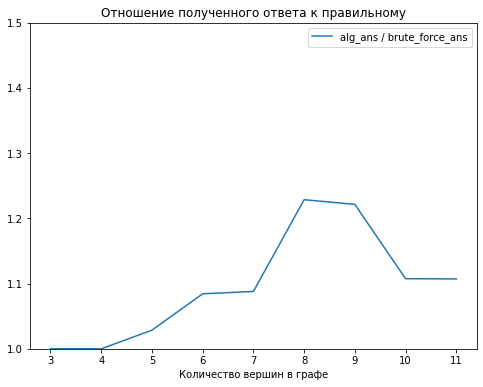

In [58]:
plt.figure(figsize=(8, 6))

plt.title('Отношение полученного ответа к правильному')
plt.plot(arr, alg_answers / brute_force_answers,
         label='alg_ans / brute_force_ans')
plt.xlabel('Количество вершин в графе')
plt.ylim(1., 1.5)
plt.legend()
plt.show()

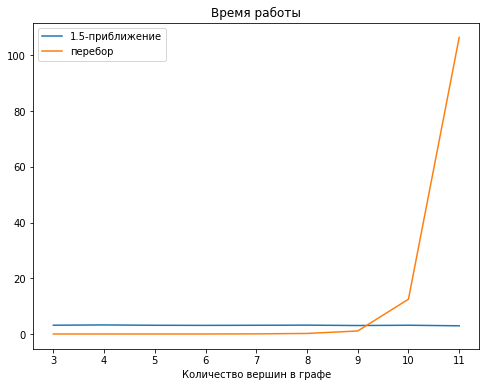

In [59]:
plt.figure(figsize=(8, 6))

plt.title('Время работы')
plt.plot(arr, alg_times, label='1.5-приближение')
plt.plot(arr, brute_force_times, label='перебор')
plt.xlabel('Количество вершин в графе')
plt.legend()
plt.show()

### 4. Известные датасеты

**26 вершин**

In [70]:
true_ans = 937

V = 26
g = np.array([[0,83,93,129,133,139,151,169,135,114,110,98,99,95,81,152,159,181,172,185,147,157,185,220,127,181],
[83,0,40,53,62,64,91,116,93,84,95,98,89,68,67,127,156,175,152,165,160,180,223,268,179,197],
[93,40,0,42,42,49,59,81,54,44,58,64,54,31,36,86,117,135,112,125,124,147,193,241,157,161],
[129,53,42,0,11,11,46,72,65,70,88,100,89,66,76,102,142,156,127,139,155,180,228,278,197,190],
[133,62,42,11,0,9,35,61,55,62,82,95,84,62,74,93,133,146,117,128,148,173,222,272,194,182],
[139,64,49,11,9,0,39,65,63,71,90,103,92,71,82,100,141,153,124,135,156,181,230,280,202,190],
[151,91,59,46,35,39,0,26,34,52,71,88,77,63,78,66,110,119,88,98,130,156,206,257,188,160],
[169,116,81,72,61,65,26,0,37,59,75,92,83,76,91,54,98,103,70,78,122,148,198,250,188,148],
[135,93,54,65,55,63,34,37,0,22,39,56,47,40,55,37,78,91,62,74,96,122,172,223,155,128],
[114,84,44,70,62,71,52,59,22,0,20,36,26,20,34,43,74,91,68,82,86,111,160,210,136,121],
[110,95,58,88,82,90,71,75,39,20,0,18,11,27,32,42,61,80,64,77,68,92,140,190,116,103],
[98,98,64,100,95,103,88,92,56,36,18,0,11,34,31,56,63,85,75,87,62,83,129,178,100,99],
[99,89,54,89,84,92,77,83,47,26,11,11,0,23,24,53,68,89,74,87,71,93,140,189,111,107],
[95,68,31,66,62,71,63,76,40,20,27,34,23,0,15,62,87,106,87,100,93,116,163,212,132,130],
[81,67,36,76,74,82,78,91,55,34,32,31,24,15,0,73,92,112,96,109,93,113,158,205,122,130],
[152,127,86,102,93,100,66,54,37,43,42,56,53,62,73,0,44,54,26,39,68,94,144,196,139,95],
[159,156,117,142,133,141,110,98,78,74,61,63,68,87,92,44,0,22,34,38,30,53,102,154,109,51],
[181,175,135,156,146,153,119,103,91,91,80,85,89,106,112,54,22,0,33,29,46,64,107,157,125,51],
[172,152,112,127,117,124,88,70,62,68,64,75,74,87,96,26,34,33,0,13,63,87,135,186,141,81],
[185,165,125,139,128,135,98,78,74,82,77,87,87,100,109,39,38,29,13,0,68,90,136,186,148,79],
[147,160,124,155,148,156,130,122,96,86,68,62,71,93,93,68,30,46,63,68,0,26,77,128,80,37],
[157,180,147,180,173,181,156,148,122,111,92,83,93,116,113,94,53,64,87,90,26,0,50,102,65,27],
[185,223,193,228,222,230,206,198,172,160,140,129,140,163,158,144,102,107,135,136,77,50,0,51,64,58],
[220,268,241,278,272,280,257,250,223,210,190,178,189,212,205,196,154,157,186,186,128,102,51,0,93,107],
[127,179,157,197,194,202,188,188,155,136,116,100,111,132,122,139,109,125,141,148,80,65,64,93,0,90],
[181,197,161,190,182,190,160,148,128,121,103,99,107,130,130,95,51,51,81,79,37,27,58,107,90,0]])
    
g.shape

(26, 26)

In [71]:
tsp_solver = MetricTSP(V, g)
cycle = tsp_solver.ham_cycle()
cur = cycle[0]
ans = 0
for v in cycle[1:]:
    ans += g[cur][v]
    cur = v

mst:  [(0, 14), (14, 13), (13, 9), (9, 10), (10, 12), (12, 11), (9, 8), (13, 2), (8, 6), (6, 7), (6, 4), (4, 5), (4, 3), (8, 15), (15, 18), (18, 19), (19, 17), (17, 16), (16, 20), (20, 21), (21, 25), (2, 1), (21, 22), (22, 23), (22, 24)]
min_perfect_matching:  [(1, 2), (7, 8), (5, 6), (0, 14), (12, 13), (9, 10), (11, 15), (3, 4)]
eul_cycle:  [0, 24, 23, 22, 25, 21, 20, 16, 17, 19, 18, 2, 1, 2, 13, 9, 12, 10, 9, 8, 6, 4, 3, 4, 5, 6, 7, 8, 15, 11, 12, 13, 14, 0]
ham_cycle:  [0, 24, 23, 22, 25, 21, 20, 16, 17, 19, 18, 2, 1, 13, 9, 12, 10, 8, 6, 4, 3, 5, 7, 15, 11, 14, 0]


In [73]:
print('Ответ, полученный алгоритмом: {}'.format(ans))
print("Верный ответ: {}".format(true_ans))
print("Частное: {}".format(ans / true_ans))

Ответ, полученный алгоритмом: 1170
Верный ответ: 937
Частное: 1.248665955176094


**17 вершин**

In [76]:
true_ans = 2085

V = 17
g = np.array(
    [[0,633,257,91,412,150,80,134,259,505,353,324,70,211,268,246,121],
[633,0,390,661,227,488,572,530,555,289,282,638,567,466,420,745,518],
[257,390,0,228,169,112,196,154,372,262,110,437,191,74,53,472,142],
[91,661,228,0,383,120,77,105,175,476,324,240,27,182,239,237,84],
[412,227,169,383,0,267,351,309,338,196,61,421,346,243,199,528,297],
[150,488,112,120,267,0,63,34,264,360,208,329,83,105,123,364,35],
[80,572,196,77,351,63,0,29,232,444,292,297,47,150,207,332,29],
[134,530,154,105,309,34,29,0,249,402,250,314,68,108,165,349,36],
[259,555,372,175,338,264,232,249,0,495,352,95,189,326,383,202,236],
[505,289,262,476,196,360,444,402,495,0,154,578,439,336,240,685,390],
[353,282,110,324,61,208,292,250,352,154,0,435,287,184,140,542,238],
[324,638,437,240,421,329,297,314,95,578,435,0,254,391,448,157,301],
[70,567,191,27,346,83,47,68,189,439,287,254,0,145,202,289,55],
[211,466,74,182,243,105,150,108,326,336,184,391,145,0,57,426,96],
[268,420,53,239,199,123,207,165,383,240,140,448,202,57,0,483,153],
[246,745,472,237,528,364,332,349,202,685,542,157,289,426,483,0,336],
[121,518,142,84,297,35,29,36,236,390,238,301,55,96,153,336,0]])

    
g.shape

(17, 17)

In [78]:
tsp_solver = MetricTSP(V, g)
cycle = tsp_solver.ham_cycle()
cur = cycle[0]
ans = 0
for v in cycle[1:]:
    ans += g[cur][v]
    cur = v
    
print('\nОтвет, полученный алгоритмом: {}'.format(ans))
print("Верный ответ: {}".format(true_ans))
print("Частное: {}".format(ans / true_ans))

mst:  [(0, 12), (12, 3), (12, 6), (6, 7), (6, 16), (7, 5), (16, 13), (13, 14), (14, 2), (2, 10), (10, 4), (10, 9), (3, 8), (8, 11), (11, 15), (4, 1)]
min_perfect_matching:  [(1, 4), (2, 5), (3, 6), (0, 7)]
eul_cycle:  [9, 4, 1, 4, 10, 15, 11, 8, 7, 6, 0, 12, 3, 6, 16, 13, 14, 2, 5, 7, 0]
ham_cycle:  [9, 4, 1, 10, 15, 11, 8, 7, 6, 0, 12, 3, 16, 13, 14, 2, 5, 9]

Ответ, полученный алгоритмом: 2716
Верный ответ: 2085
Частное: 1.3026378896882493


### 5. Вывод

Алгоритм, действительно выдаёт ответ, не более чем в 1.5 раза отличающийся от правильного, при этом уже при 10 вершинах время его работы в несколько раз меньше времени работы перебора. 